<a href="https://colab.research.google.com/github/iMikeJr/Optimizacion-no-lineal/blob/main/BFGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

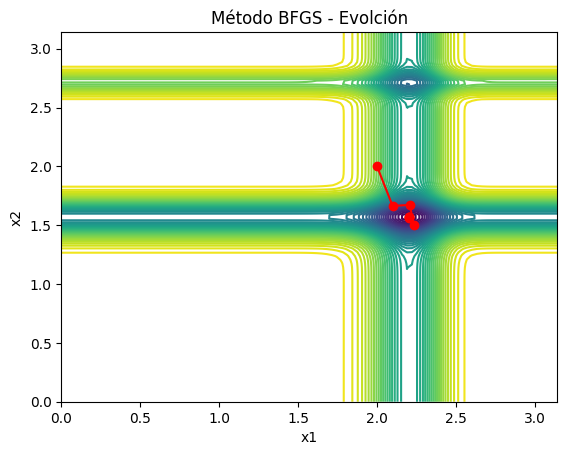

[2.20301464 1.57079633]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función de Michalewicz
def michalewicz(x, m=10):
    d = len(x)
    return -sum(np.sin(x[i]) * (np.sin((i+1) * x[i]**2 / np.pi))**(2 * m) for i in range(d))

def grad_michalewicz(x, m=10):
    d = len(x)
    grad = np.zeros(d)
    for i in range(d):
        term1 = np.sin((i+1) * x[i]**2 / np.pi)**(2 * m)
        term2 = (np.sin(2*(i+1) * x[i]**2 / np.pi) * (2*m*(i+1)*x[i]) / np.pi)
        grad[i] = -np.sin(x[i]) * term2 - term1 * np.cos(x[i])
    return grad

def metodo_bfgs(f, grad_f, x0, tol=1e-5, max_iter=100):
    H = np.eye(len(x0))  # Aproximación inicial de la matriz hessiana
    x = x0
    x_history = [x0]  #Es solo el historial de puntos para graficar cómo se desempeña el método

    for _ in range(max_iter):
        gradiente = grad_f(x)
        if np.linalg.norm(gradiente) < tol:
            break

        p = -np.dot(H, gradiente)
        alpha = 1  # Búsqueda lineal aproximada (Condición de armijo)
        while f(x + alpha * p) > f(x) + 0.1 * alpha * np.dot(gradiente, p):
            alpha *= 0.5

        x_nuevo = x + alpha * p
        s = x_nuevo - x
        y = grad_f(x_nuevo) - gradiente
        rho = 1.0 / np.dot(y, s)
        H = (np.eye(len(x)) - rho * np.outer(s, y)) @ H @ (np.eye(len(x)) - rho * np.outer(y, s)) + rho * np.outer(s, s)
        #np.outer es eficiente y de utilidad para calcular los productos matriciales del algoritmo del tipo
        #AB^T
        x = x_nuevo
        x_history.append(x)

    return x, x_history

#Graficamos las curvas de nivel de la función de Michalewicz
def graficar_historial_contorno(f, x_history):
    x1 = np.linspace(0, np.pi, 100)
    x2 = np.linspace(0, np.pi, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Z[i, j] = f([X1[i, j], X2[i, j]])

    plt.contour(X1, X2, Z, 50)
    x_history = np.array(x_history)
    plt.plot(x_history[:, 0], x_history[:, 1], 'ro-')
    plt.title('Método BFGS - Evolción')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

x0 = np.array([2.0, 2.0])
resultado, historial_x = metodo_bfgs(michalewicz, grad_michalewicz, x0)
graficar_historial_contorno(michalewicz, historial_x)
print(resultado)
